# Chapter 23: Python Data Science Libraries


As a general-purpose programming language, Python is now the most popular programming language in the world. It’s easy to use and has great community support. This chapter introduces you to four useful Python data science libraries in finance: NumPy, NumPy Financial, Pandas, and Matplotlib. These libraries will be your tools for processing financial data, conducting analyses, performing financial calculations, and creating visualizations such as graphs and charts.

Chapter Objectives

1. Manipulate multidimensional data using NumPy
2. Conduct financial calculations using NumPy Financial
3. Process tabular data with Pandas.
4. Create plots and charts with Matplotlib.

In [1]:
!pip install pandas matplotlib numpy numpy-financial

GMAT = [550, 640, 710, 590, 560, 585, 720, 660, 600, 610,
        570, 580, 630, 690, 675]

In [2]:
num = 0
for score in GMAT:
    if score > 650:
        num += 1
print("the number of students who scored above 650 is", num)

the number of students who scored above 650 is 5


In [3]:
import numpy as np #1

GMAT = [550, 640, 710, 590, 560, 585, 720, 660, 600, 610,
        570, 580, 630, 690, 675] #2
GMAT_arr = np.array(GMAT) #3
print((GMAT_arr>650).sum()) #4

5


In [4]:
GPA = [3.0, 3.12, 3.14, 3.56, 3.33, 3.10, 3.78, 3.94, 4.0,
        3.66, 3.45, 3.88, 3.92, 3.03, 3.22] #1
GMAT_GPA = GMAT + GPA #2
GMAT_GPA_arr = np.array(GMAT_GPA)
print(GMAT_GPA_arr.size) #3
print(GMAT_GPA_arr.shape)

GMAT_GPA_arr=GMAT_GPA_arr.reshape((2,15)) #4
print(GMAT_GPA_arr)
print(GMAT_GPA_arr.shape)

30
(30,)
[[550.   640.   710.   590.   560.   585.   720.   660.   600.   610.
  570.   580.   630.   690.   675.  ]
 [  3.     3.12   3.14   3.56   3.33   3.1    3.78   3.94   4.     3.66
    3.45   3.88   3.92   3.03   3.22]]
(2, 15)


In [5]:
print(GMAT_arr[4])

560


In [6]:
print(GMAT_GPA_arr[1,9])

3.66


In [7]:
print("the GMAT scores of the first two students are", GMAT_GPA_arr[0, 0:2])
print("the GPAs of the last three students are", GMAT_GPA_arr[1, -3:])
print("the GMAT score and GPA of the sixth student are", GMAT_GPA_arr[:, 5])

the GMAT scores of the first two students are [550. 640.]
the GPAs of the last three students are [3.92 3.03 3.22]
the GMAT score and GPA of the sixth student are [585.    3.1]


In [8]:
print("the average GMAT score of all students is", GMAT_GPA_arr[0, :].mean())
print("the average GPA of all students is", GMAT_GPA_arr[1, :].mean())

the average GMAT score of all students is 624.6666666666666
the average GPA of all students is 3.4753333333333334


In [9]:
print("the sum of GMAT score of all students is", GMAT_GPA_arr[0, :].sum())
print("the lowest GMAT score of all students is", GMAT_GPA_arr[0, :].min())
print("the highest GPA of all students is", GMAT_GPA_arr[1, :].max())

the sum of GMAT score of all students is 9370.0
the lowest GMAT score of all students is 550.0
the highest GPA of all students is 4.0


In [10]:
print("the index of the lowest GMAT score is", GMAT_GPA_arr[0, :].argmin())
print("the index of the highest GPA is", GMAT_GPA_arr[1, :].argmax())

the index of the lowest GMAT score is 0
the index of the highest GPA is 8


In [11]:
print("the 5th percentile value of GMAT scores is", np.percentile(GMAT_GPA_arr[0, :], 5))
print("the median value of GMAT scores is", np.percentile(GMAT_GPA_arr[0, :], 50))
print("the median value of GPAs is", np.percentile(GMAT_GPA_arr[1, :], 50))
print("the 90th percentile value of GPSs is", np.percentile(GMAT_GPA_arr[1, :], 90))

the 5th percentile value of GMAT scores is 557.0
the median value of GMAT scores is 610.0
the median value of GPAs is 3.45
the 90th percentile value of GPSs is 3.932


In [12]:
mask1 = (GMAT_GPA_arr[0, :]<=600)
mask2 = (GMAT_GPA_arr[1, :]==4.0)
print(mask1)
print(mask2)
print("number of GMAT scores below or equal to 600 is", mask1.sum())
print("number of 4.0 GPA is", mask2.sum())

[ True False False  True  True  True False False  True False  True  True
 False False False]
[False False False False False False False False  True False False False
 False False False]
number of GMAT scores below or equal to 600 is 7
number of 4.0 GPA is 1


In [13]:
import numpy_financial as npf
rate=0.1
nper=100
pmt=0
pv=-500
balance=npf.fv(rate,nper,pmt,pv)
print(f"the balance is USD {round(balance,2)}")

the balance is USD 6890306.17


In [14]:
rate=0.05
nper=18
pmt=0
fv=200000
investment=npf.pv(rate,nper,pmt,fv)
print(f"the investment needed is USD {round(investment,2)}")

the investment needed is USD -83104.13


In [15]:
nper=8
pmt=0
pv=-1000
fv=2000
r=npf.rate(nper,pmt,pv,fv)
print(f"the interest rate is {round(r,4)}")

the interest rate is 0.0905


In [16]:
rate=0.18/12
pmt=-300
pv=2000
n=npf.nper(rate,pmt,pv)
print(f"the number of months to pay off the debt is {n}")

the number of months to pay off the debt is 7.076583912842856


In [17]:
rate=0.06/12
pv=200000
nper=30*12
per=3
pmt=npf.pmt(rate,nper,pv)
ppmt=npf.ppmt(rate,per,nper,pv)
ipmt=npf.ipmt(rate,per,nper,pv)
print(f"the monthly mortgage payment is USD {pmt:.2f}")
print(f"the principal payment in month 3 is USD {ppmt:.2f}")
print(f"the interest payment in month 3 is USD {ipmt:.2f}")

the monthly mortgage payment is USD -1199.10
the principal payment in month 3 is USD -201.10
the interest payment in month 3 is USD -998.00


In [18]:
rate=0.14
values=[-31000,22000,15000,11000]
NPV=npf.npv(rate,values)
IRR=npf.irr(values)
print(f"the NPV of the project is USD {NPV:.2f}")
print(f"the IRR of the project is {IRR:.4f}")

the NPV of the project is USD 7264.95
the IRR of the project is 0.2949


In [19]:
import pandas as pd

names = ["James Smith","Michael Smith","Maria Garcia","David Smith",
         "Maria Rodriguez","Mary Smith","Maria Hernandez","Maria Martinez",
         "James Johnson","Mary Liu","Gloria Zhang","Raj Gupta","Anna Ivanov",
         "Ali Sayed","Lakisha Jones"]

GMAT = [550, 640, 710, 590, 560, 585, 720, 660, 600, 610,
        570, 580, 630, 690, 675]

GMAT_series = pd.Series(data=GMAT, index=names)
print(GMAT_series) 

James Smith        550
Michael Smith      640
Maria Garcia       710
David Smith        590
Maria Rodriguez    560
Mary Smith         585
Maria Hernandez    720
Maria Martinez     660
James Johnson      600
Mary Liu           610
Gloria Zhang       570
Raj Gupta          580
Anna Ivanov        630
Ali Sayed          690
Lakisha Jones      675
dtype: int64


In [20]:
print("the GMAT score of David Smith is", GMAT_series["David Smith"])
print("the GMAT score of Anna Ivanov is", GMAT_series["Anna Ivanov"]) 

the GMAT score of David Smith is 590
the GMAT score of Anna Ivanov is 630


In [21]:
GPA = [3.0, 3.12, 3.14, 3.56, 3.33, 3.10, 3.78, 3.94, 4.0,
        3.66, 3.45, 3.88, 3.92, 3.03, 3.22]

dataset = {"GMAT_score":GMAT, "GPAs":GPA}

df = pd.DataFrame(data=dataset, index=names)
print(df) 

                 GMAT_score  GPAs
James Smith             550  3.00
Michael Smith           640  3.12
Maria Garcia            710  3.14
David Smith             590  3.56
Maria Rodriguez         560  3.33
Mary Smith              585  3.10
Maria Hernandez         720  3.78
Maria Martinez          660  3.94
James Johnson           600  4.00
Mary Liu                610  3.66
Gloria Zhang            570  3.45
Raj Gupta               580  3.88
Anna Ivanov             630  3.92
Ali Sayed               690  3.03
Lakisha Jones           675  3.22


In [22]:
print(df["GMAT_score"])
print("the GMAT score of Maria Garcia is",\
 df["GMAT_score"]["Maria Garcia"]) 

James Smith        550
Michael Smith      640
Maria Garcia       710
David Smith        590
Maria Rodriguez    560
Mary Smith         585
Maria Hernandez    720
Maria Martinez     660
James Johnson      600
Mary Liu           610
Gloria Zhang       570
Raj Gupta          580
Anna Ivanov        630
Ali Sayed          690
Lakisha Jones      675
Name: GMAT_score, dtype: int64
the GMAT score of Maria Garcia is 710


In [23]:
print("the GPA of Ali Sayed is", df.at["Ali Sayed","GPAs"])

the GPA of Ali Sayed is 3.03


In [24]:
print("the GMAT score and GPA of Gloria Zhang is\n",\
 df.loc["Gloria Zhang"])

the GMAT score and GPA of Gloria Zhang is
 GMAT_score    570.00
GPAs            3.45
Name: Gloria Zhang, dtype: float64


In [25]:
df1 = pd.read_csv("files/student_info.csv")
print(df1) 

              names  GMAT_score  GPAs nationality
0       James Smith         550  3.00          US
1     Michael Smith         640  3.12          US
2      Maria Garcia         710  3.14          US
3       David Smith         590  3.56          US
4   Maria Rodriguez         560  3.33          US
5        Mary Smith         585  3.10          US
6   Maria Hernandez         720  3.78       Brzil
7    Maria Martinez         660  3.94        Peru
8     James Johnson         600  4.00          US
9          Mary Liu         610  3.66       China
10     Gloria Zhang         570  3.45       China
11        Raj Gupta         580  3.88       India
12      Anna Ivanov         630  3.92      Russia
13        Ali Sayed         690  3.03        Iran
14    Lakisha Jones         675  3.22          US


In [26]:
print("the shape of df1 is", df1.shape)
print("the size of df1 is", df1.size)

the shape of df1 is (15, 4)
the size of df1 is 60


In [27]:
print(df1.head())
print(df1.tail(n=3))

             names  GMAT_score  GPAs nationality
0      James Smith         550  3.00          US
1    Michael Smith         640  3.12          US
2     Maria Garcia         710  3.14          US
3      David Smith         590  3.56          US
4  Maria Rodriguez         560  3.33          US
            names  GMAT_score  GPAs nationality
12    Anna Ivanov         630  3.92      Russia
13      Ali Sayed         690  3.03        Iran
14  Lakisha Jones         675  3.22          US


In [28]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   names        15 non-null     object 
 1   GMAT_score   15 non-null     int64  
 2   GPAs         15 non-null     float64
 3   nationality  15 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 608.0+ bytes
None


In [29]:
print(df1.iloc[2])
print(df1.iloc[2:5])

names          Maria Garcia
GMAT_score              710
GPAs                   3.14
nationality              US
Name: 2, dtype: object
             names  GMAT_score  GPAs nationality
2     Maria Garcia         710  3.14          US
3      David Smith         590  3.56          US
4  Maria Rodriguez         560  3.33          US


In [30]:
print("the median GMAT score is", df1["GMAT_score"].median())
print("the standard deviation of GPAs is", df1["GPAs"].std())

the median GMAT score is 610.0
the standard deviation of GPAs is 0.3662135728675016


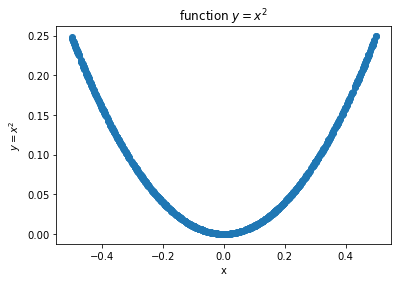

In [31]:
import matplotlib.pyplot as plt

x = np.random.rand(1000) - 0.5
y = x**2

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('$y=x^2$')
plt.title('function $y=x^2$')
plt.show()


<AxesSubplot:title={'center':'GMAT Scores'}>

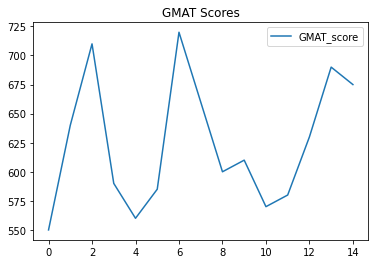

In [32]:
import pandas as pd
df1 = pd.read_csv("files/student_info.csv")

df1.plot(y = 'GMAT_score', title = 'GMAT Scores')


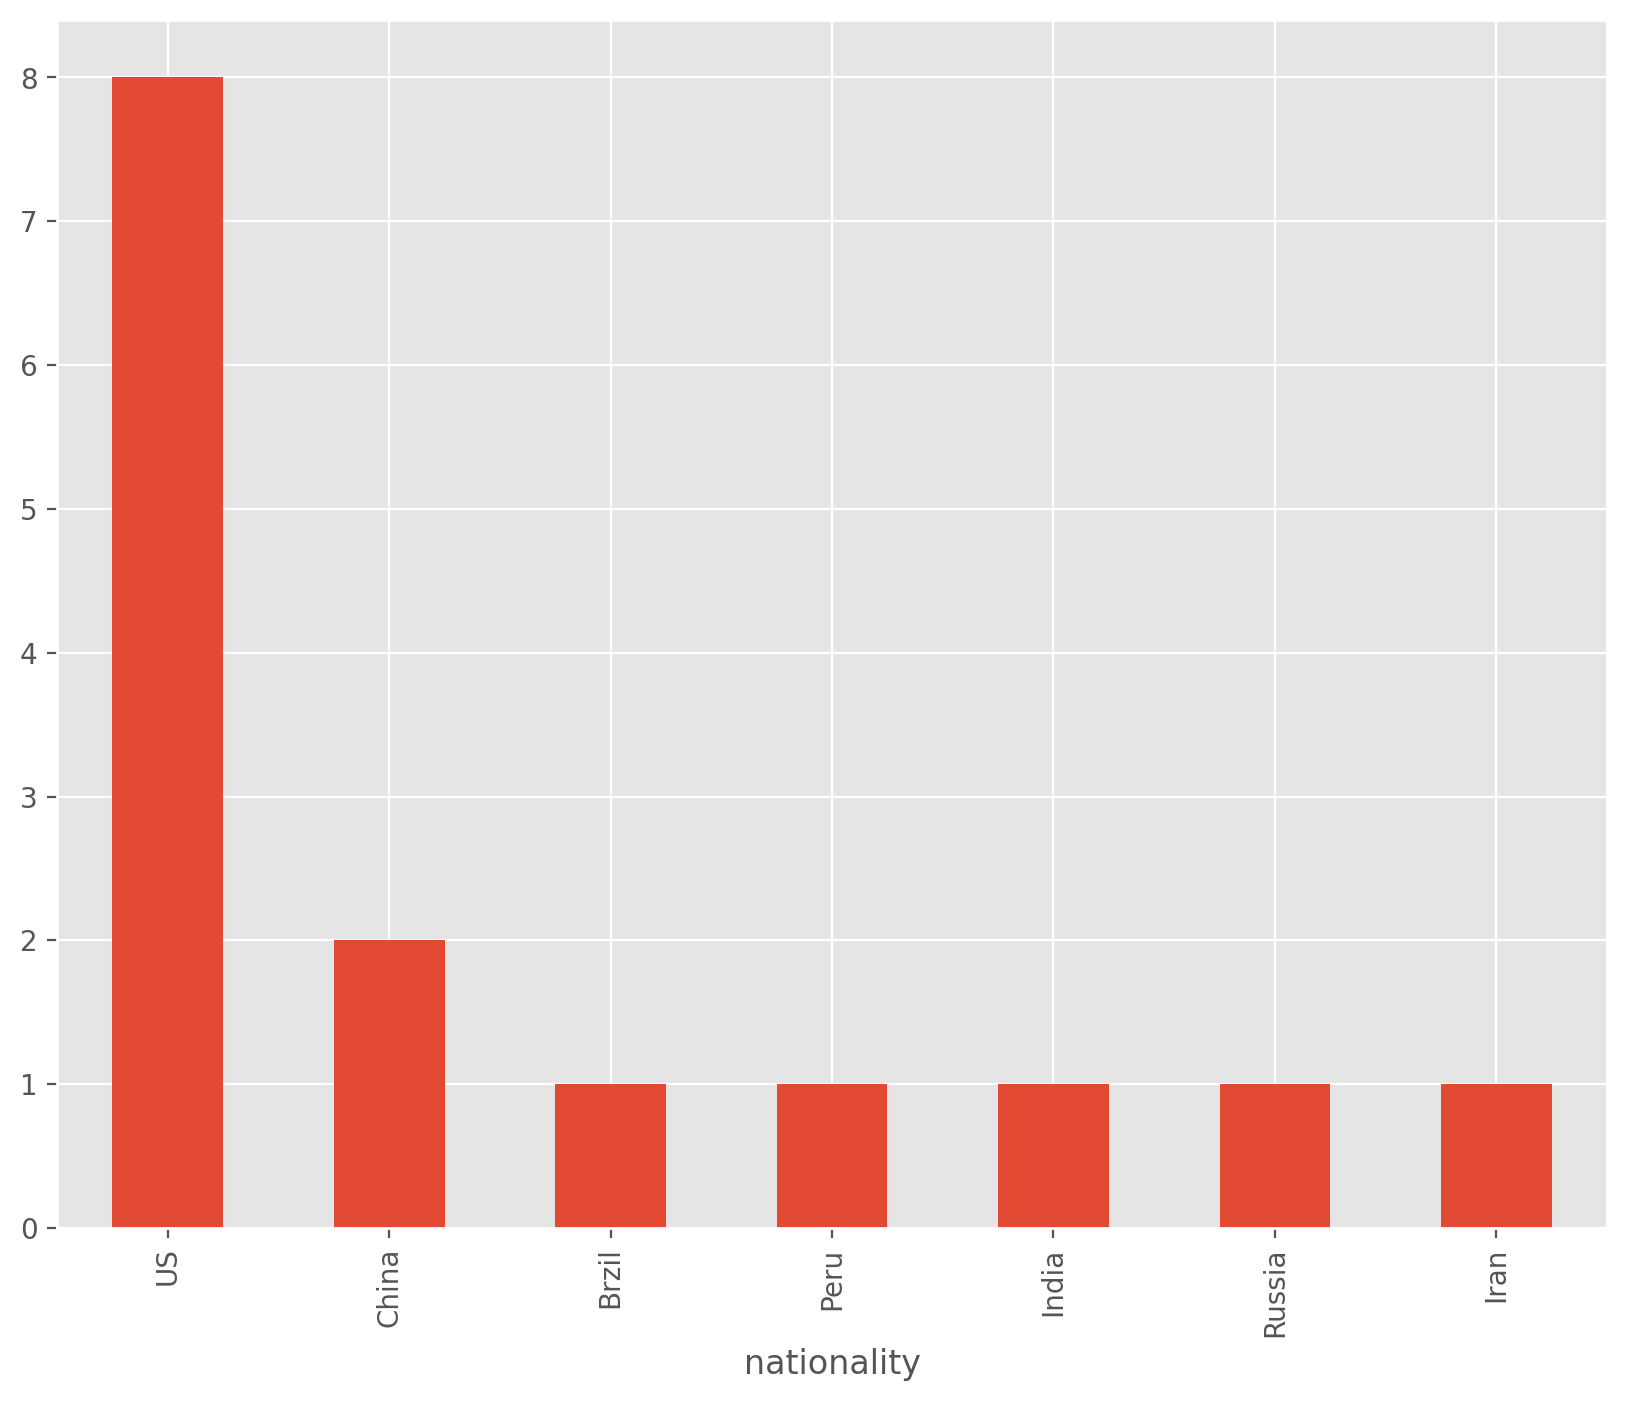

In [33]:
fig=plt.figure(dpi=200, figsize=(10,8))
nationality_cnt = df1['nationality'].value_counts()
plt.style.use('ggplot')
nationality_cnt.plot(kind ='bar')
plt.show()